In [17]:
import pandas as pd
import numpy as np
from pathlib import Path
from typing import Dict, List, Union, Optional
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats
import seaborn as sns
import os
import datetime
import subprocess
import jinja2
import copy

In [1]:
import matplotlib.pyplot as plt
import numpy as np

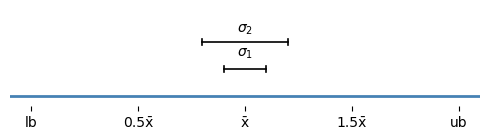

In [2]:
# Figure setup
fig, ax = plt.subplots(figsize=(5, 1.5))
ax.axhline(0, color='steelblue', linewidth=2)

# Tick positions and labels
positions = [0, 1, 2, 3, 4]
labels = ['lb', '0.5x̄', 'x̄', '1.5x̄', 'ub']
ax.set_xticks(positions)
ax.set_xticklabels(labels)

# Hide y-axis
ax.get_yaxis().set_visible(False)

# Draw sigma bars
# σ₁
ax.plot([1.8, 2.2], [0.25, 0.25], color='black', linewidth=1.2)
ax.plot([1.8, 1.8], [0.22, 0.28], color='black', linewidth=1.2)
ax.plot([2.2, 2.2], [0.22, 0.28], color='black', linewidth=1.2)
ax.text(2, 0.32, r'$\sigma_1$', ha='center', va='bottom')

# σ₂
ax.plot([1.6, 2.4], [0.5, 0.5], color='black', linewidth=1.2)
ax.plot([1.6, 1.6], [0.47, 0.53], color='black', linewidth=1.2)
ax.plot([2.4, 2.4], [0.47, 0.53], color='black', linewidth=1.2)
ax.text(2, 0.55, r'$\sigma_2$', ha='center', va='bottom')

# Clean up
ax.set_xlim(-0.2, 4.2)
ax.set_ylim(-0.1, 0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()


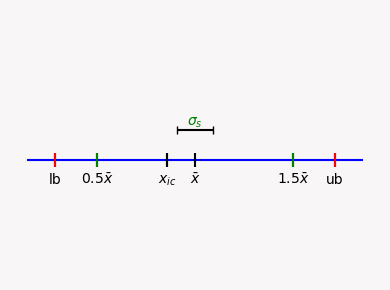

In [13]:
import matplotlib.pyplot as plt

# Define mean and bounds
x_bar = 1.0  # mean
lower_bound = 0.5
upper_bound = 1.5
xinit = 0.9

# Slightly extended short range
half_range_factor = 0.35
half_range_start = x_bar - half_range_factor
half_range_end = x_bar + half_range_factor
half_range_length = half_range_end - half_range_start
full_range_length = upper_bound - lower_bound

# Sigma line heights closer to axis
sigma1_height = 0.025
sigma2_y = sigma1_height + 0.02  # stacked closer
sigma2_height = 0.125 * full_range_length

# Plot
fig, ax = plt.subplots(figsize=(4, 3))

# Main axis
ax.hlines(0, lower_bound - 0.1, upper_bound + 0.1, color='blue')

# Tick marks and labels
xticks = [lower_bound, half_range_start, xinit, x_bar, half_range_end, upper_bound]
xlabels = ['lb', r'$0.5\bar{x}$', r'$x_{ic}$', r'$\bar{x}$', r'$1.5\bar{x}$', 'ub']
for x, label in zip(xticks, xlabels):
    ax.vlines(x, -0.006, 0.006, color='black')
    ax.text(x, -0.02, label, ha='center')
ax.vlines(lower_bound, -0.006, 0.006, color='red')
ax.vlines(upper_bound, -0.006, 0.006, color='red')
ax.vlines(half_range_start, -0.006, 0.006, color='green')
ax.vlines(half_range_end, -0.006, 0.006, color='green')
ax.vlines(xinit, -0.006, 0.006, color='black')

# Sigma_1 line
ax.hlines(sigma1_height, x_bar - 0.0625, x_bar + 0.0625, color='black', linewidth=1.5)
ax.vlines([x_bar - 0.0625, x_bar + 0.0625], sigma1_height - 0.0035, sigma1_height + 0.0035, color='black', linewidth=1)
ax.text(x_bar, sigma1_height + 0.004, r'$\sigma_s$', ha='center', color='green')

# Sigma_2 line
# ax.hlines(sigma2_y, x_bar - 0.0875, x_bar + 0.0875, color='black', linewidth=1.5)
# ax.vlines([x_bar - 0.0875, x_bar + 0.0875], sigma2_y - 0.0035, sigma2_y + 0.0035, color='black', linewidth=1)
# ax.text(x_bar, sigma2_y + 0.004, r'$\sigma_2$', ha='center', color='red')

fig.patch.set_facecolor('#f8f6f6')

# Aesthetics
ax.set_ylim(-0.1, sigma2_y + 0.08)
ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def plot_compare_summary(...,
    legend_pos: str = "below",
    curve_labels: bool = False,
    # --- NEW knobs for curve labels ---
    curve_label_min_gap_frac: float = 0.02,  # 2% of y-range minimum vertical gap
    curve_label_xpad: float = -2.5,          # x position (hours) for left labels
    curve_label_connectors: bool = True,
    # -----------------------------------
    show_axp: bool = True,
    figsize=(12, 8)
):

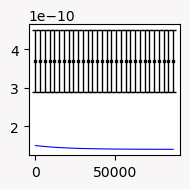

In [19]:
# Sample time vector
t = np.linspace(0, 86400, 30)  # from 0 to 24 hours in 30 points

# Measured data (constant with error bars)
measured_mean = np.full_like(t, 3.7e-10)
measured_err = np.full_like(t, 8e-11)

# Model prediction (decreasing over time)
predicted = 1.4e-10 + 1e-11 * np.exp(-t / 20000)

# Plot
fig, ax = plt.subplots(figsize=(2, 2))
fig.patch.set_facecolor('#f8f6f6')  # Canvas background color

# Error bars for measured data
ax.errorbar(t, measured_mean, yerr=measured_err, fmt='s', color='black',
            ecolor='black', elinewidth=1, capsize=2, label='measured',
            markersize=2)

# Model prediction line
ax.plot(t, predicted, color='blue', label='BCRN6', linewidth=0.8)

# Axis labels
#ax.set_xlabel(r'$t$ / S', fontsize=14, style='italic')
ax.set_ylabel('', fontsize=12)

# Log-like y scale with scientific notation
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# Legend
#ax.legend(loc='upper center', frameon=False, fontsize=10)

# Tight layout
plt.tight_layout()
plt.show()